In [60]:
from wordcloud import WordCloud
from glob import glob
from os import path
import pandas as pd
import re
from textblob import TextBlob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')

In [ ]:
#merge the json to single DF
from glob import glob

file_names = glob(path.join('bumble','*.json'))
dfs = [pd.read_json(fn, lines = True) for fn in file_names]
bumble_df = pd.concat(dfs)

bumble_df['tweet']

In [79]:
tweets = pd.DataFrame(bumble_df['tweet'])
tweets

,tweet
0,@ThatKidConor Welcome to the Hive! 🙌 Feel fre...
1,@AustinTXSteph @bumble Girl I legit cried. SO ...
2,@bumble LMFAOOOOO FINE YOU CONVINCED ME
3,@graciegirl013 @bumble Wow!! That’s so sweet!!
4,I AM SO MAD THAT I DIDNT TAKE THE OPPORTUNITY ...
...,...
35,CDC updates COVID-19 guidelines for cruise shi...
36,CDC updates COVID-19 guidelines for cruise shi...
37,CDC updates COVID-19 guidelines for cruise shi...
38,@BumbleSupport #Bumble @bumble @BumbleSupport ...


In [80]:
tweets.head()

,tweet
0,@ThatKidConor Welcome to the Hive! 🙌 Feel fre...
1,@AustinTXSteph @bumble Girl I legit cried. SO ...
2,@bumble LMFAOOOOO FINE YOU CONVINCED ME
3,@graciegirl013 @bumble Wow!! That’s so sweet!!
4,I AM SO MAD THAT I DIDNT TAKE THE OPPORTUNITY ...


In [88]:
#convert all to uppercase
tweets['tweet'] = tweets['tweet'].str.upper()
#filter the text for #Bumble and @Bumble
bumble_rate = tweets[tweets['tweet'].str.contains('@BUMBLE ') == True]
bumble_hash = tweets[tweets['tweet'].str.contains('#BUMBLE ') == True]

#Clean the test
def cleanTxt(text):
    text =  re.sub(r'@[A-Za-z0-9]+' , '', text) # removed @ mentions
    text =  re.sub(r'#' , '', text) # removed # mentions
    text =  re.sub(r'RT[\s]' , '', text) # removed RT
    text =  re.sub(r'https?:\/\/\S+' , '', text) # removed web url
    text =  re.sub(r'HTTPS?:\/\/\S+' , '', text) # removed web url
    return text

In [89]:
tweets = pd.concat([bumble_rate , bumble_hash])
tweets = tweets.drop_duplicates()
tweets['CleanTweet'] = tweets['tweet'].apply(cleanTxt)
tweets

,tweet,CleanTweet,polarity,subjectivity
1,@AUSTINTXSTEPH @BUMBLE GIRL I LEGIT CRIED. SO ...,GIRL I LEGIT CRIED. SO SWEET ❤️,0.350000,0.650000
2,@BUMBLE LMFAOOOOO FINE YOU CONVINCED ME,LMFAOOOOO FINE YOU CONVINCED ME,0.416667,0.500000
3,@GRACIEGIRL013 @BUMBLE WOW!! THAT’S SO SWEET!!,WOW!! THAT’S SO SWEET!!,0.351562,0.825000
4,I AM SO MAD THAT I DIDNT TAKE THE OPPORTUNITY ...,I AM SO MAD THAT I DIDNT TAKE THE OPPORTUNITY ...,-0.041667,0.533333
6,@MICHAEI_OC @TINDER @BUMBLE @HINGE ANY RETWEETS?,_OC ANY RETWEETS?,0.000000,0.000000
...,...,...,...,...
33,Y QUE LES GUSTE EL PLÁSTICO EN EL EXTERIOR #B...,Y QUE LES GUSTE EL PLÁSTICO EN EL EXTERIOR BU...,0.000000,0.000000
34,ESTUVE ASÍ 🤏🏻 DE DESCARGAR #BUMBLE 🤪,ESTUVE ASÍ 🤏🏻 DE DESCARGAR BUMBLE 🤪,0.000000,0.000000
35,CDC UPDATES COVID-19 GUIDELINES FOR CRUISE SHI...,CDC UPDATES COVID-19 GUIDELINES FOR CRUISE SHI...,0.000000,0.000000
36,CDC UPDATES COVID-19 GUIDELINES FOR CRUISE SHI...,CDC UPDATES COVID-19 GUIDELINES FOR CRUISE SHI...,0.000000,0.000000


In [110]:
df = pd.concat([bumble_rate , bumble_hash])
df = df.drop_duplicates(subset = ["tweet"])
df


,tweet,CleanTweet,polarity,subjectivity
1,@AUSTINTXSTEPH @BUMBLE GIRL I LEGIT CRIED. SO ...,GIRL I LEGIT CRIED. SO SWEET ❤️,0.350000,0.650000
2,@BUMBLE LMFAOOOOO FINE YOU CONVINCED ME,LMFAOOOOO FINE YOU CONVINCED ME,0.416667,0.500000
3,@GRACIEGIRL013 @BUMBLE WOW!! THAT’S SO SWEET!!,WOW!! THAT’S SO SWEET!!,0.351562,0.825000
4,I AM SO MAD THAT I DIDNT TAKE THE OPPORTUNITY ...,I AM SO MAD THAT I DIDNT TAKE THE OPPORTUNITY ...,-0.041667,0.533333
6,@MICHAEI_OC @TINDER @BUMBLE @HINGE ANY RETWEETS?,_OC ANY RETWEETS?,0.000000,0.000000
...,...,...,...,...
33,Y QUE LES GUSTE EL PLÁSTICO EN EL EXTERIOR #B...,Y QUE LES GUSTE EL PLÁSTICO EN EL EXTERIOR BU...,0.000000,0.000000
34,ESTUVE ASÍ 🤏🏻 DE DESCARGAR #BUMBLE 🤪,ESTUVE ASÍ 🤏🏻 DE DESCARGAR BUMBLE 🤪,0.000000,0.000000
35,CDC UPDATES COVID-19 GUIDELINES FOR CRUISE SHI...,CDC UPDATES COVID-19 GUIDELINES FOR CRUISE SHI...,0.000000,0.000000
36,CDC UPDATES COVID-19 GUIDELINES FOR CRUISE SHI...,CDC UPDATES COVID-19 GUIDELINES FOR CRUISE SHI...,0.000000,0.000000


In [90]:
#create a function to get subjectivity
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

#create a function to get polarity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

tweets['polarity'] = tweets['CleanTweet'].apply(getPolarity)
tweets['subjectivity'] = tweets['CleanTweet'].apply(getSubjectivity)

In [91]:
tweets.head()

,tweet,CleanTweet,polarity,subjectivity
1,@AUSTINTXSTEPH @BUMBLE GIRL I LEGIT CRIED. SO ...,GIRL I LEGIT CRIED. SO SWEET ❤️,0.350000,0.650000
2,@BUMBLE LMFAOOOOO FINE YOU CONVINCED ME,LMFAOOOOO FINE YOU CONVINCED ME,0.416667,0.500000
3,@GRACIEGIRL013 @BUMBLE WOW!! THAT’S SO SWEET!!,WOW!! THAT’S SO SWEET!!,0.351562,0.825000
4,I AM SO MAD THAT I DIDNT TAKE THE OPPORTUNITY ...,I AM SO MAD THAT I DIDNT TAKE THE OPPORTUNITY ...,-0.041667,0.533333
6,@MICHAEI_OC @TINDER @BUMBLE @HINGE ANY RETWEETS?,_OC ANY RETWEETS?,0.000000,0.000000


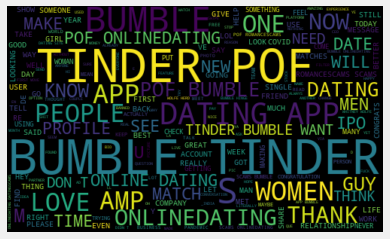

In [92]:
# Plot the Word Cloud
allWords = ' '.join([twts for twts in tweets['CleanTweet']])
wordCloud = WordCloud(width = 500 , height = 300 , random_state = 21,
                     max_font_size = 119).generate(allWords)
plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis('off')
plt.show()

In [95]:
#create a function to compute the -ve , neutral and +ve analysis
def getAnalysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    elif score > 0:
        return 'Positive'
tweets['Analysis'] = tweets['polarity'].apply(getAnalysis)

4     I AM SO MAD THAT I DIDNT TAKE THE OPPORTUNITY ...
16                              DOWN...  HERE I COME 👍🏻
35      R U SERIOUS??? I’M SOOO SORRY!   I HAVE REPO...
37    THERE’S SOMETHING SO DARK ABOUT “THE HANDMAID’...
39    DATING WEBSITES SHOULD ADD A FEATURE WHERE YOU...
                            ...                        
39    DATING APPS WANT YOU TO STAY SINGLE... PREFERA...
10    AS FAR AS DATING COMPANIES GO, WHICH STOCK DO ...
18    2021 TOUR TICKETS    YOUTUBE    PODCAST SPOTIF...
37    MATCH GROUP FIGHTS OFF INVESTOR SUIT ON FAKE D...
4     GLOSSY BOX EASTER EGG LIMITED EDITION 2021GLOS...
Name: CleanTweet, Length: 4748, dtype: object

KeyError: 650

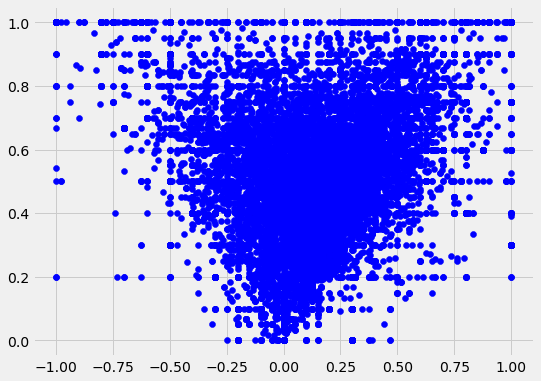

In [114]:
# Plot the polarity and subjectivity
plt.figure(figsize = (8,6))
for i in range(0,tweets.shape[0]):
    plt.scatter(tweets['polarity'][i], tweets['subjectivity'][i], color = 'Blue')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

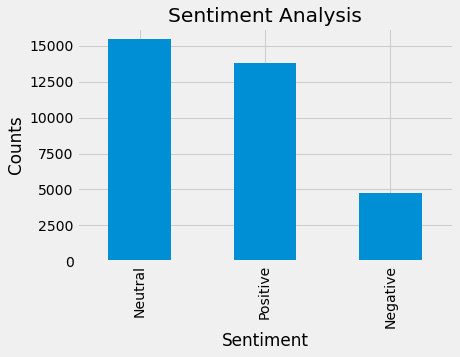

In [126]:
#plot skewed to right (positive)
# Get count of positive tweet

plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
tweets['Analysis'].value_counts().plot(kind = 'bar')
plt.show()